In [9]:
import re

import pandas as pd
from matplotlib import mlab
from matplotlib import pyplot as plt

In [ ]:
# データの確認と適切な処理を行う

# データの読み込み
path = "../stock_price.csv"
df = pd.read_csv(path, parse_dates=["日付け"])

# ラベルの日本語化
df = df.rename(
    columns={
        "日付け": "Date",
        "終値": "Close",
        "始値": "Open",
        "高値": "High",
        "安値": "Low",
        "出来高": "Volume",
        "変化率 %": "Change",
    }
)

# 欠損値確認
print(df.isnull().sum())


# 出来高は省略表現なので処理。まず、省略記号の一覧を取得。
symbols = set()
for value in df["Volume"]:
    # 正規表現を利用してre.subで置換
    symbol = re.sub(r"\d*\.?\d*", "", str(value))
    # pythonの構文で、if (str)で空文かどうか判断できる
    if symbol:  # 空文字列でない場合
        symbols.add(symbol)
        # symbols = {"B", "M"}

print(list(symbols))


# 省略表現を数値に変換するカスタムメソッド
def convert_volume(value):
    number = float(re.sub(r"[BM]", "", str(value)))
    if "B" in str(value):
        return number * 1000000000
    elif "M" in str(value):
        return number * 1000000
    else:
        return number


features = df.copy()
# 重要: データの順番を逆転
features = features.iloc[::-1].reset_index(drop=True)
features["Volume"] = features["Volume"].apply(convert_volume)
features["Change"] = features["Change"].str.replace("%", "").astype(float)

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64
['M', 'B']


In [11]:
features

,Date,Close,Open,High,Low,Volume,Change
0,1987-02-12,182.4,182.4,182.4,182.4,1.280000e+09,16.25
1,1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-5.43
2,1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,1.74
3,1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,3.93
4,1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,4.82
...,...,...,...,...,...,...,...
9197,2024-07-26,157.9,159.3,159.6,157.9,1.550800e+08,-0.13
9198,2024-07-29,159.7,158.7,160.2,158.4,1.262800e+08,1.14
9199,2024-07-30,158.7,158.8,159.2,158.0,1.381400e+08,-0.63
9200,2024-07-31,160.4,158.2,160.7,158.1,1.739100e+08,1.07


In [12]:
type(features["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

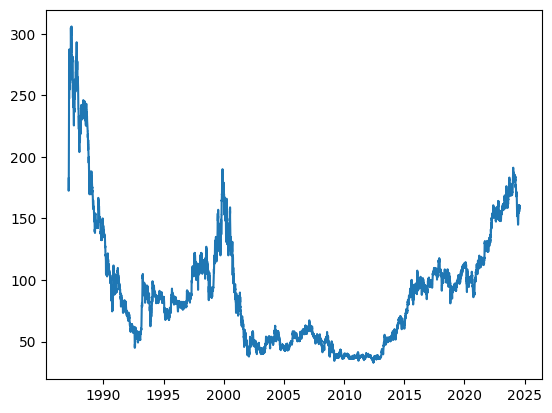

In [13]:
plt.plot(features["Date"], features["Close"])

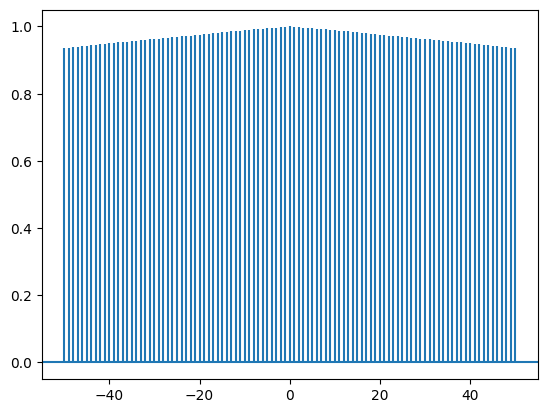

In [14]:
acor = plt.acorr(features["Close"], detrend=mlab.detrend_linear, maxlags=50)

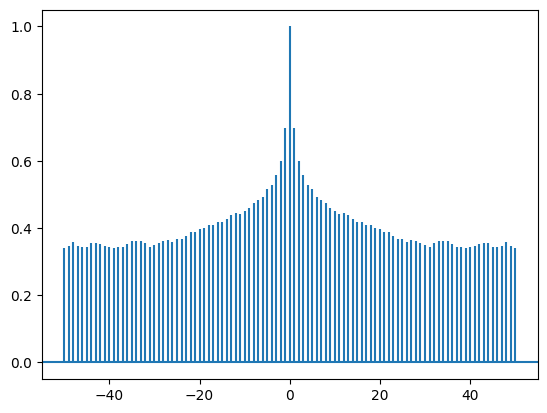

In [15]:
acor = plt.acorr(features["Volume"], detrend=mlab.detrend_linear, maxlags=50)

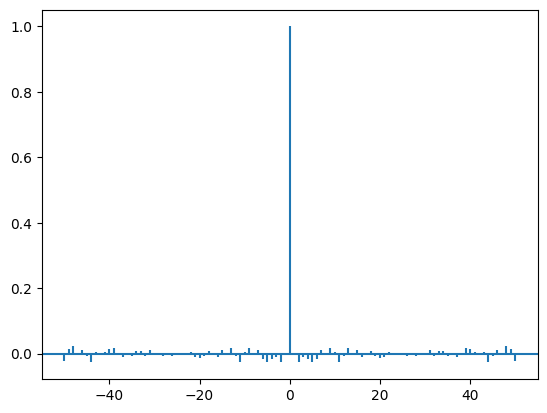

In [16]:
acor = plt.acorr(features["Change"], detrend=mlab.detrend_linear, maxlags=50)